In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report # import classification_report

In [2]:
file_to_delete = '/content/Redwinequality.csv'

if os.path.exists(file_to_delete):
    os.remove(file_to_delete)
    print(f"{file_to_delete} has been deleted.")
else:
    print(f"{file_to_delete} doesn't exist.")
# Here we delete the dataset from drive if it exist in the drive.

/content/Redwinequality.csv doesn't exist.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from google.colab import files
uploaded = files.upload()

Saving Redwinequality.csv to Redwinequality.csv


In [5]:
df = pd.read_csv('Redwinequality.csv')
#creating an instance to read the dataset

In [6]:
df.head(10)
# Printing first ten rows from the dataset Red Wine quality.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [7]:
df.info()
# using this inbuilt function we get info about Column, Non-null, Count and Dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**An Overview of the Dataset and Its Significance:**

Consider exploring the world of red wines and evaluating their quality using a combination of sensory experiences and chemical characteristics. That trip comes to life in this dataset. It's about millennia of human history, culture, and the art of savouring life's pleasures; it's not just about wine.

**Methodology:**

Let's walk through our approach to exploring this dataset:

Data Acquisition: To begin, we import the dataset on the quality of red wines. Numerous details about the chemical characteristics and sensory quality ratings of red wines are included in this dataset.

Data Preprocessing: We tidy up the data before beginning analysis. This entails addressing any missing values and making sure our dataset is flawless.

Exploratory Data Analysis (EDA): The exciting part starts here! To find correlations between various features and wine quality ratings, we use boxplots, scatter plots, and heatmaps to visualise the data. Our objective? Find hidden trends and patterns in the data.

Hypothesis Testing: To determine whether the alcohol concentration of premium and inferior wines differs significantly, we put on our scientist hats and perform a t-test. We can learn a lot about how alcohol affects wine quality from this test.

Categorical Plot: To wrap things up, we use a categorical plot to showcase the distribution of wine quality ratings. This gives us a snapshot of the different quality categories present in our dataset.

Our objective is to acquire a more profound comprehension of the mechanisms underlying red wines and communicate our findings via engrossing illustrations and perceptive evaluations.

**Why Is This Dataset Interesting?**

Wine Industry Impact: It is critical for winemakers to comprehend the subtleties of wine quality. We may improve the wine they make by using the insights from this dataset to direct production procedures and quality control methods.

Quality Assessment: Have you ever wondered what qualities create an excellent red wine bottle? By evaluating wine quality according to its chemical composition, this dataset aids in our investigation. We are able to identify the components that go into creating the overall quality perception.

Data Analysis Playground: This dataset serves as a sandbox for experimenting with different data analysis methods. To find hidden insights, we can clean the data, test hypotheses, and visualise it creatively.

Consumer Preferences: By exploring the connection between chemical features and sensory quality, we can gain a deeper understanding of the qualities that customers find most appealing in wines. Having this knowledge is crucial for satisfying customer preferences.

In [8]:
df.columns.tolist()
#data preprocessing

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [9]:
df[df.isnull()].count()
#This code snippet counts the number of missing values in each column of the DataFrame "df".

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


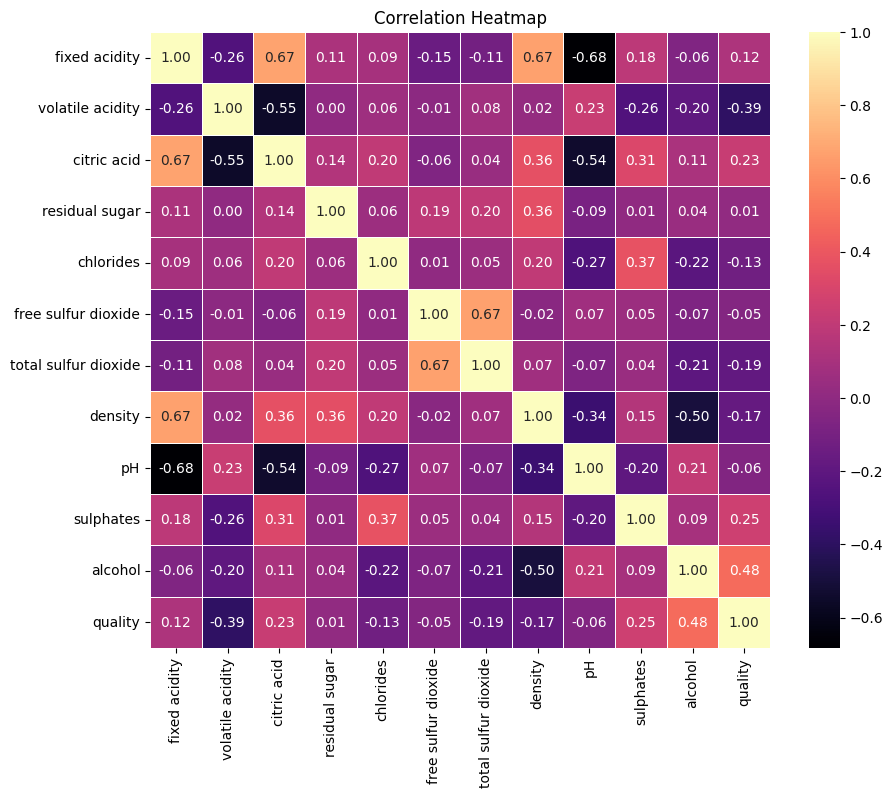

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='magma', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
# this is a correlation heatmap

The correlation between the two variables is shown in each part of the map.
Whereas negative correlations are colder (nearer -1) and positive correlations are warmer (nearer to 1).The annotation and colour intensity show how strong the association is.

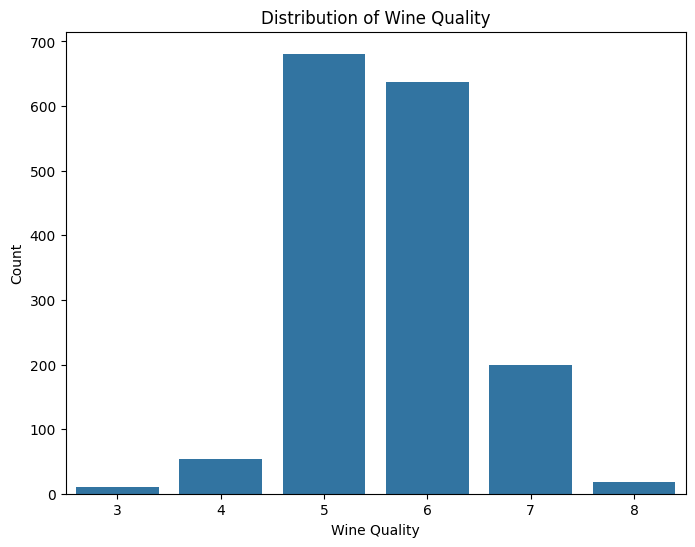

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='quality')
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality')
plt.show()
# Countplot to visualize wine quality distribution

The distribution of wine quality appears to be rather symmetrical.  The majority of wines have a quality rating of 5.  The worst wines received a rating of three, while no wine received the highest score of ten.

<Axes: xlabel='quality', ylabel='fixed acidity'>

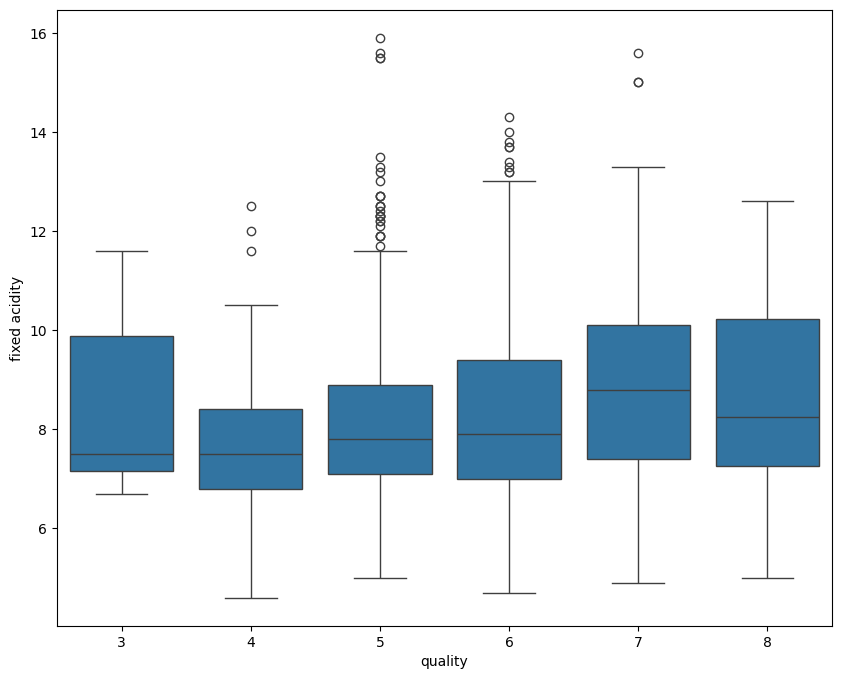

In [12]:
plt.figure(figsize=(10, 8))
sns.boxplot(x=df['quality'], y=df['fixed acidity'])
# Box plot to analyze between Quality and Fixed acidity

The boxplot graph shows how fixed acidity is distributed across a dataset's various quality ratings; the median is indicated by the line inside each box, which represents the midspread range. For each quality category, outliers are displayed as isolated points that indicate data variability and exceptions.

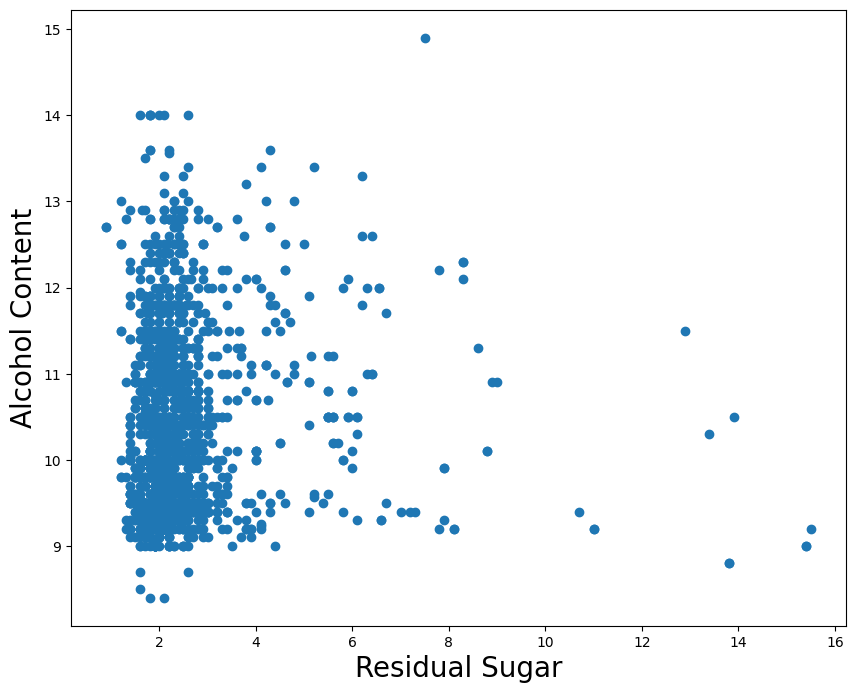

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(x=df['residual sugar'], y=df['alcohol'])
plt.xlabel('Residual Sugar').set_size(20)
plt.ylabel('Alcohol Content').set_size(20)
# Scatter plot to analyze between residual sugar and alcohol content

The scatter plot shows how the dataset's residual sugar and alcohol levels relate to one another. It clarifies the relationship between wine's alcohol percentage and sugar content. Interestingly, quality 2 and sugar levels between 9 and 13 are where most of the data points are concentrated, indicating a possible correlation between these variables.

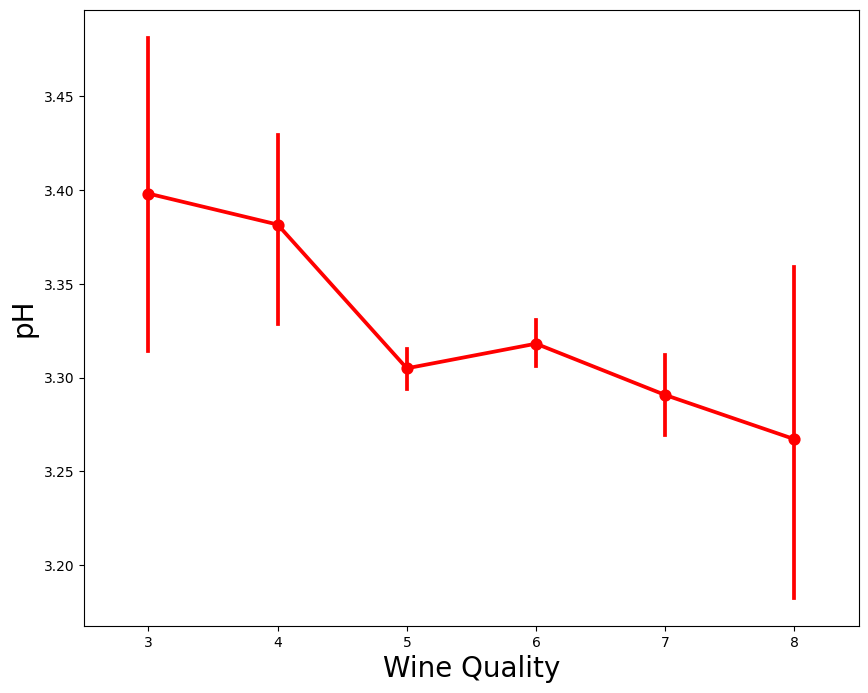

In [14]:
plt.figure(figsize=(10,8))
sns.pointplot(x=df['quality'], y=df['pH'], color='red')
plt.xlabel('Wine Quality').set_size(20)
plt.ylabel('pH').set_size(20)
# Point plot to analyze between Wine Quality and pH

Plot shows that wine quality and pH levels are negatively correlated, with higher quality wines typically having lower pH values. The error bars show that the pH readings for each wine quality score varied amongst samples.

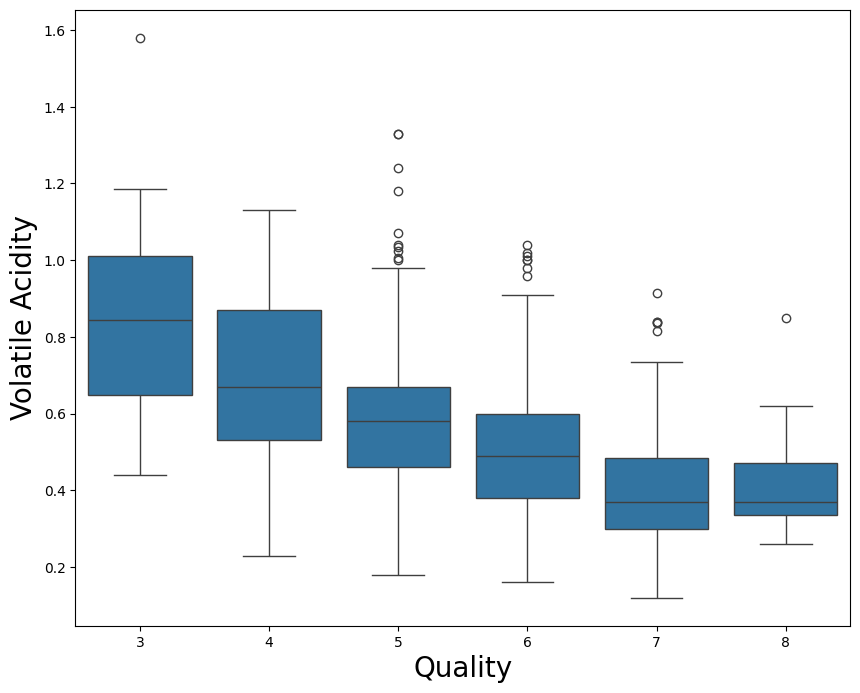

In [15]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df['quality'], y=df['volatile acidity'])
plt.xlabel('Quality').set_size(20)
plt.ylabel('Volatile Acidity').set_size(20)
# Box plot to analyze between Quality and Volatile acidity

The box plot shows that as wine quality rises, volatile acidity tends to fall, with higher quality wines typically showing lower median values of volatile acidity. Furthermore, a significant number of outliers are present at various quality levels, indicating variation in volatile acidity within each quality category.

Text(0, 0.5, 'pH')

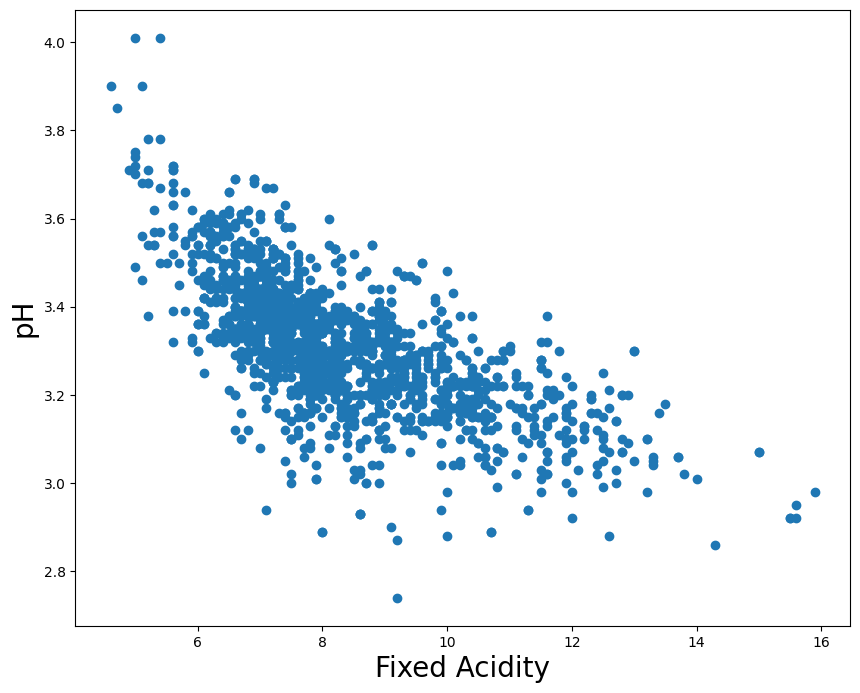

In [16]:
# Scatter plot to analyze between fixed acidity and pH.
plt.figure(figsize=(10, 8))
plt.scatter(df['fixed acidity'], df['pH'])
plt.xlabel('Fixed Acidity', fontsize=20)
plt.ylabel('pH', fontsize=20)

- A scatter plot illustrating the correlation between fixed acidity and pH levels in a wine-like beverage is displayed on the graph.
- The scattered data points point to a fluctuating and potentially intricate link between pH and fixed acidity.

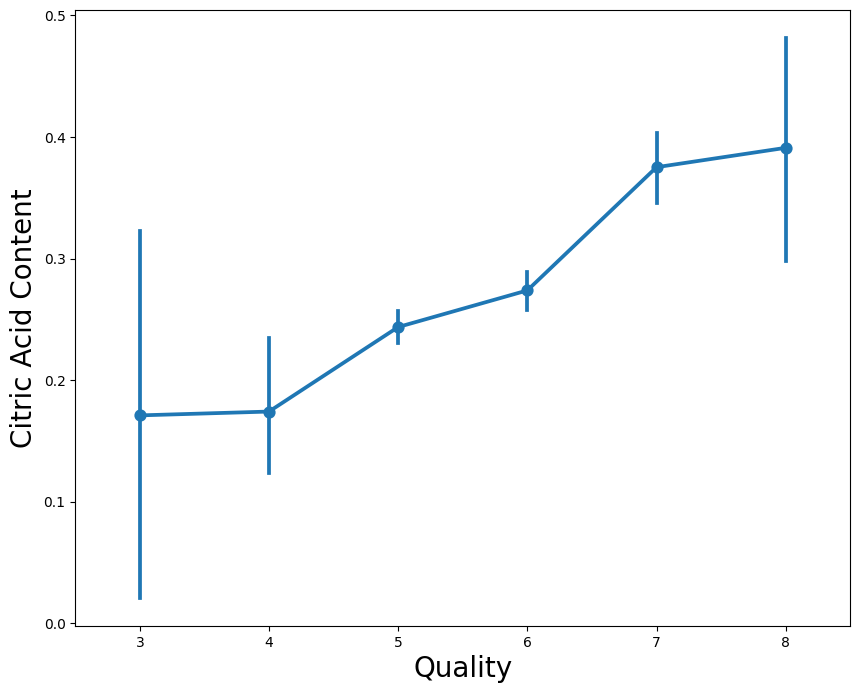

In [17]:
# Point plot to analyze between citric acid content and wine quality.
plt.figure(figsize=(10,8))
sns.pointplot(x=df['quality'], y=df['citric acid'])
plt.xlabel('Quality').set_size(20)
plt.ylabel('Citric Acid Content').set_size(20)

The given graphic plots the association between "Quality" and "Citric Acid Content" as a line graph with error bars. There is a broad pattern showing that the citric acid content tends to rise in tandem with the quality rating. The measurement of citric acid content varies at each quality level, as indicated by the error bars.

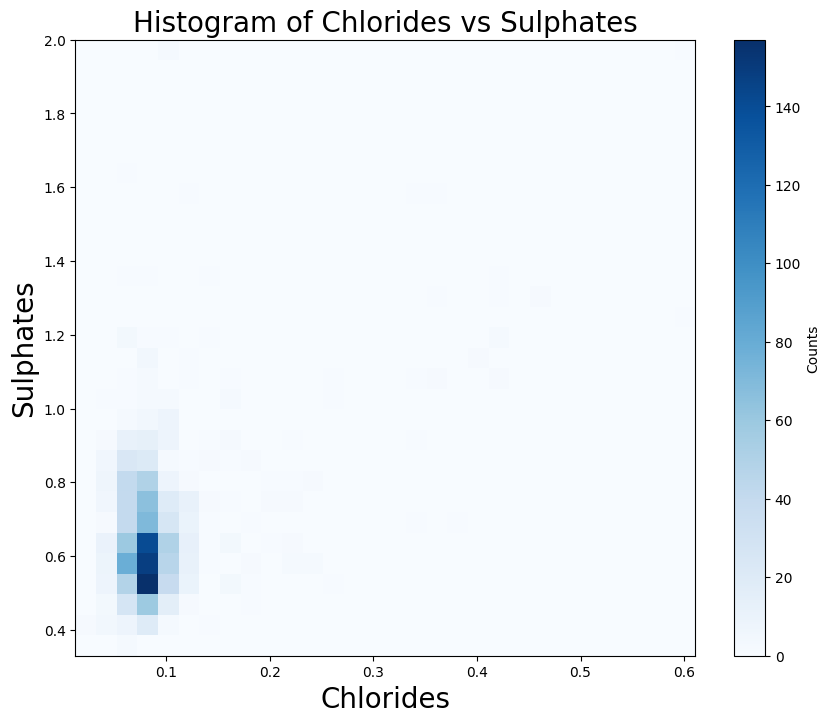

In [18]:
plt.figure(figsize=(10,8))
plt.hist2d(x=df['chlorides'], y=df['sulphates'], bins=30, cmap='Blues')
plt.colorbar(label='Counts')
plt.xlabel('Chlorides', fontsize=20)
plt.ylabel('Sulphates', fontsize=20)
plt.title('Histogram of Chlorides vs Sulphates', fontsize=20)
plt.show()
# Histogram to analyze between Cholrides and sulphates.

Indicating a left-edge peak distribution, the histogram shows a concentration of data points with lower chloride and sulphate values, with the majority of values being lower and decreasing as they travel away from the peak.

<Figure size 1000x800 with 0 Axes>

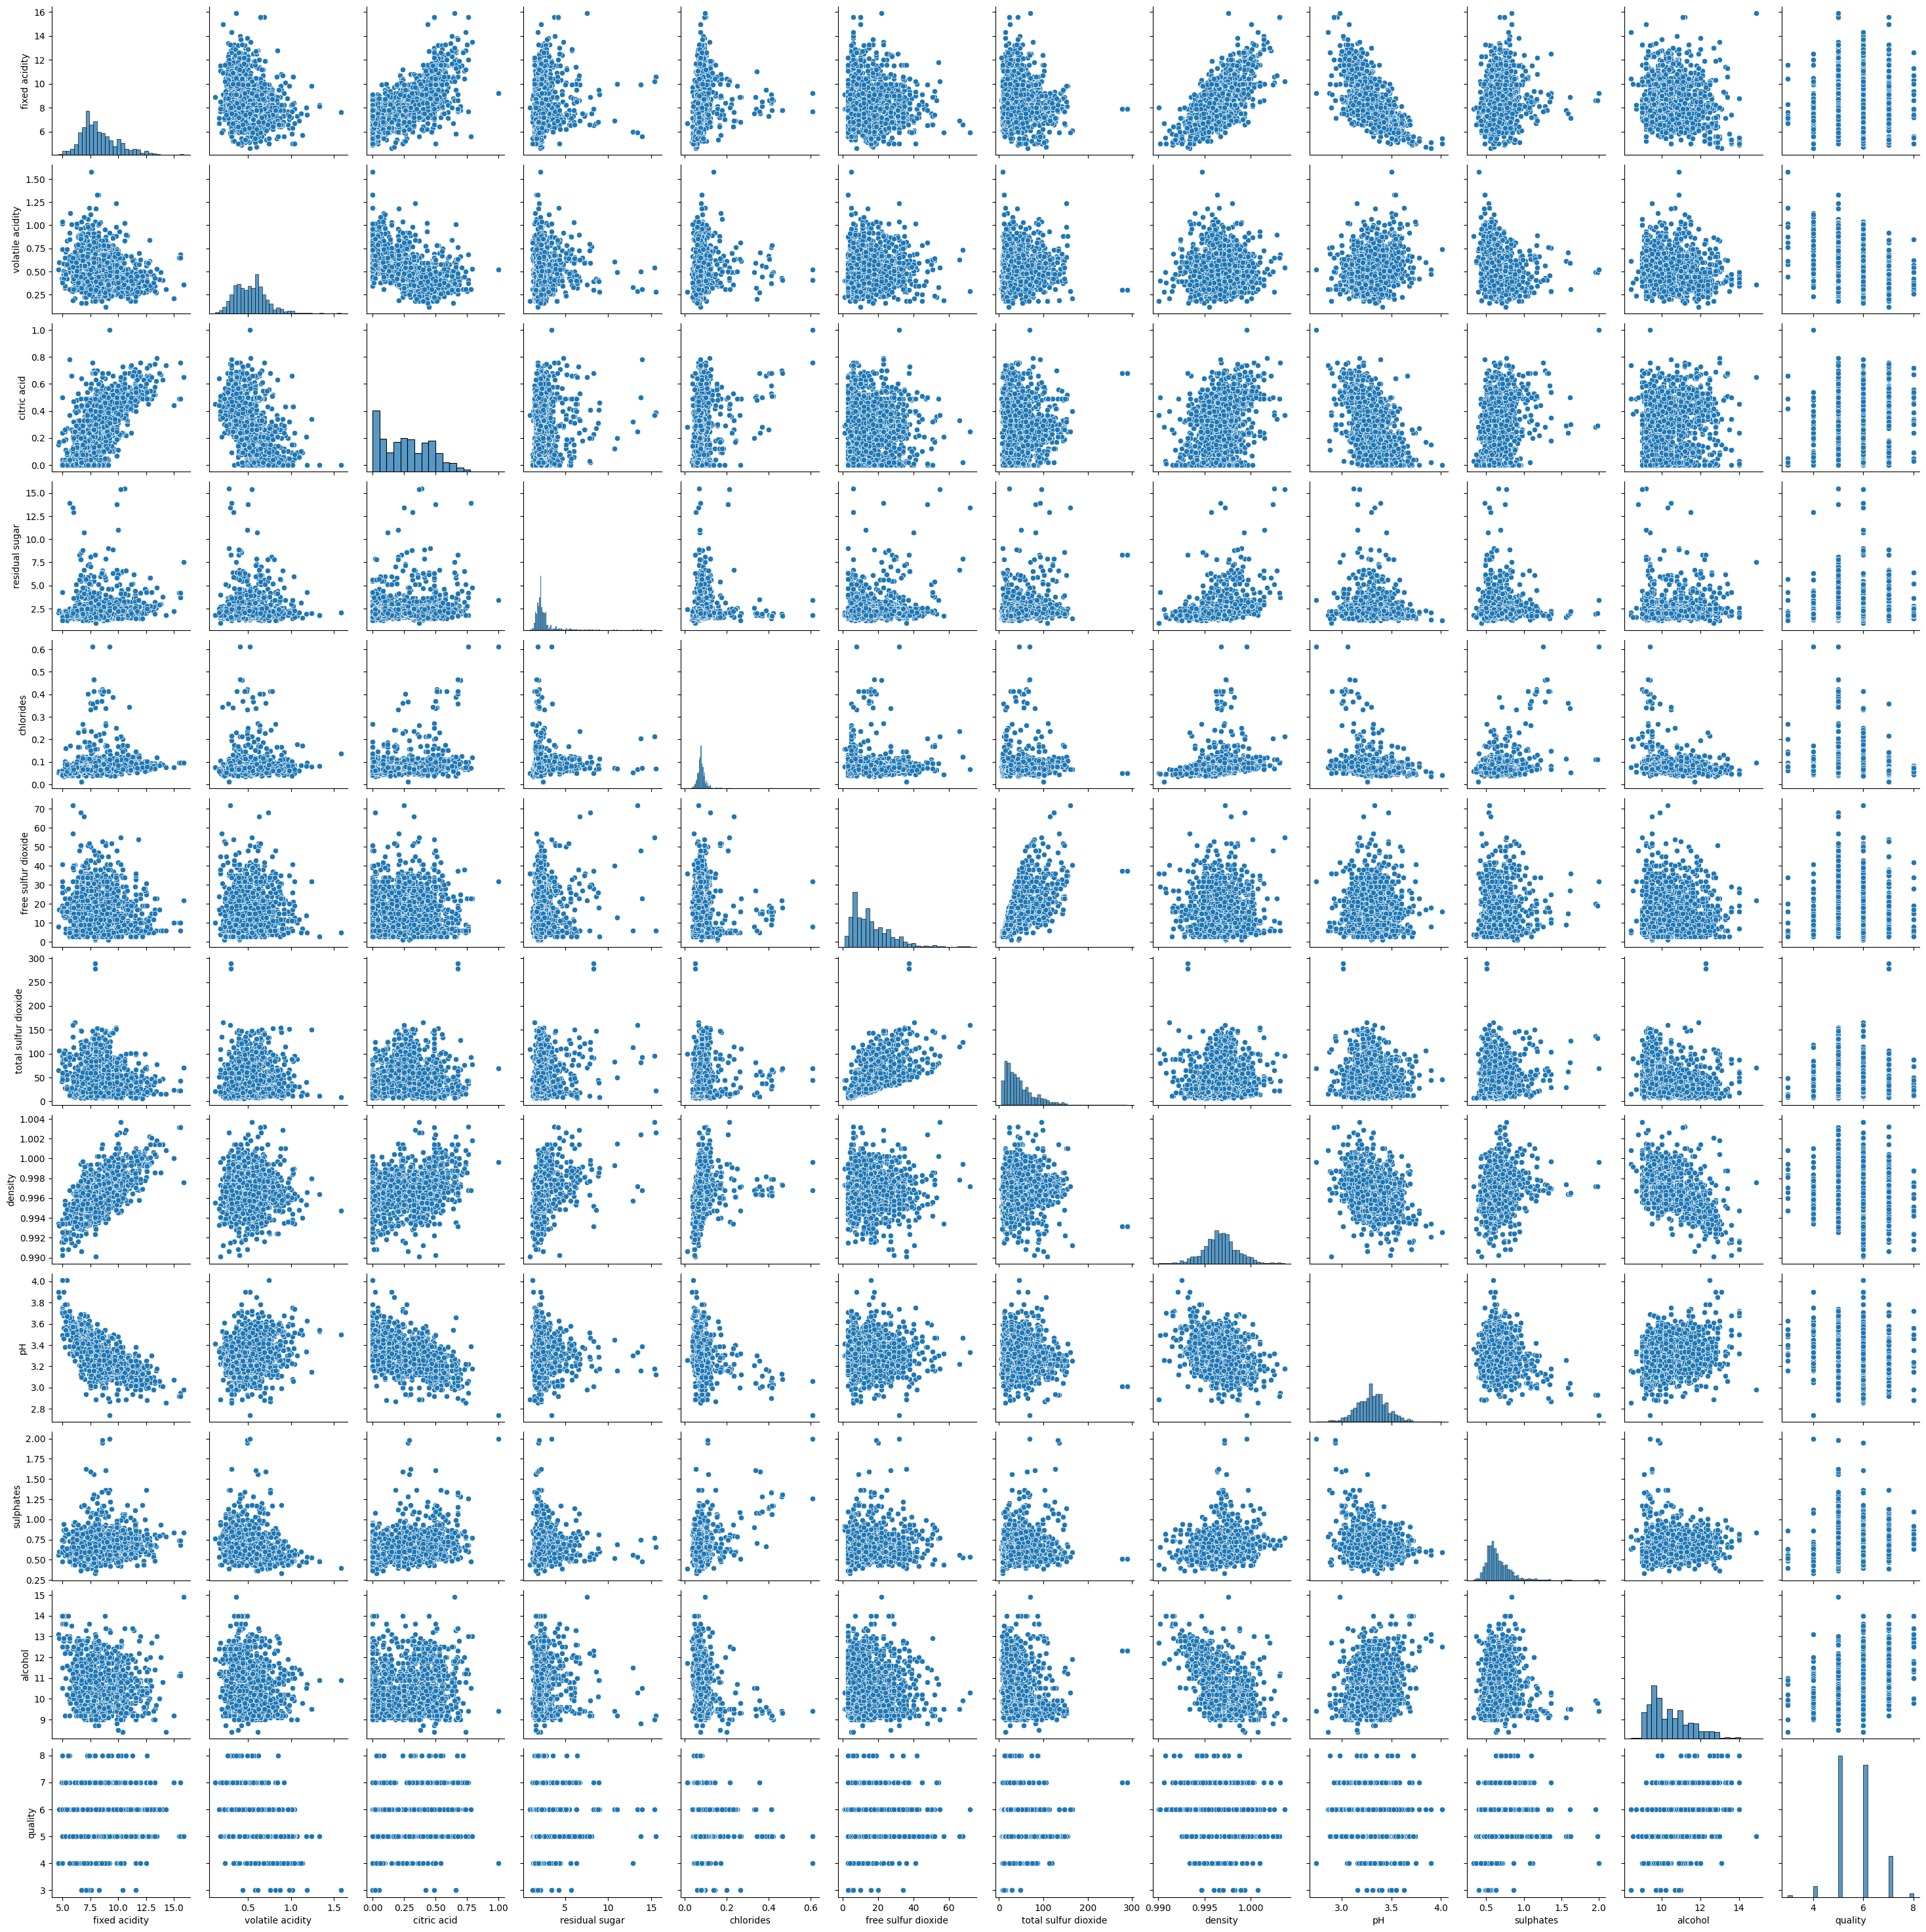

In [19]:
plt.figure(figsize=(10,8))
sns.pairplot(df)

In [20]:
# =============================================================================
# Wine Quality Prediction using Machine Learning
# =============================================================================

# Step 1: Create binary classification label
df['high_quality'] = (df['quality'] >= 7).astype(int)

# Step 2: Define features and targets
X = df.drop(['quality', 'high_quality'], axis=1)
y_regression = df['quality']
y_classification = df['high_quality']

# Step 3: Split into train/test sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_classification, test_size=0.2, random_state=42)

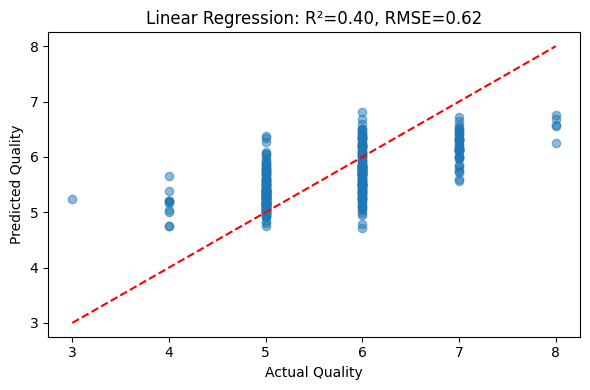

In [21]:
# --- Linear Regression ---
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = lin_reg.predict(X_test_reg)
r2 = r2_score(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
plt.figure(figsize=(6, 4))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title(f'Linear Regression: R²={r2:.2f}, RMSE={rmse:.2f}')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.tight_layout()
plt.show()

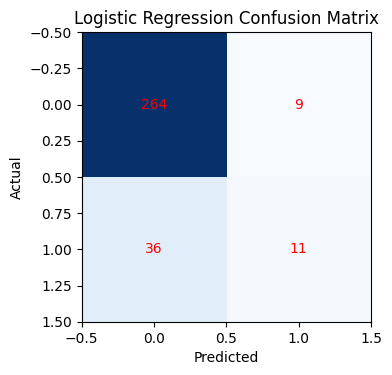

In [22]:
# --- Logistic Regression ---
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_clf, y_train_clf)
y_pred_clf = log_reg.predict(X_test_clf)
cm = confusion_matrix(y_test_clf, y_pred_clf)
plt.figure(figsize=(4, 4))
plt.imshow(cm, cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.tight_layout()
plt.show()

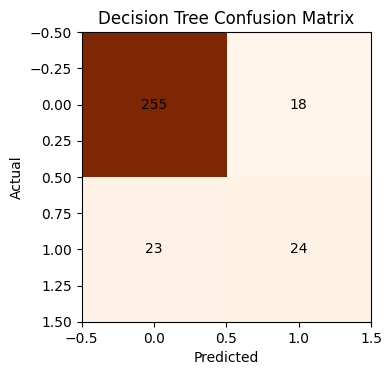

In [23]:
# --- Decision Tree ---
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_clf, y_train_clf)
y_pred_tree = tree_clf.predict(X_test_clf)
cm_tree = confusion_matrix(y_test_clf, y_pred_tree)
plt.figure(figsize=(4, 4))
plt.imshow(cm_tree, cmap='Oranges')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm_tree[i, j], ha='center', va='center', color='black')
plt.tight_layout()
plt.show()

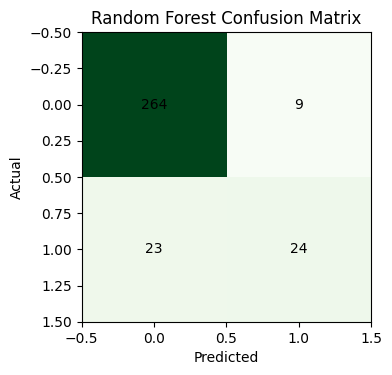

In [24]:
# --- Random Forest ---
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train_clf, y_train_clf)
y_pred_rf = rf_clf.predict(X_test_clf)
cm_rf = confusion_matrix(y_test_clf, y_pred_rf)
plt.figure(figsize=(4, 4))
plt.imshow(cm_rf, cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm_rf[i, j], ha='center', va='center', color='black')
plt.tight_layout()
plt.show()

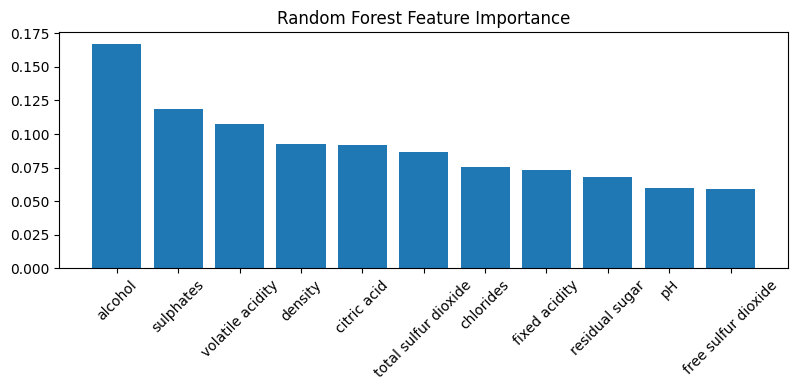

In [25]:
# Feature importance
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns
plt.figure(figsize=(8, 4))
plt.title('Random Forest Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

In [28]:
# Metrics summary
print('--- Linear Regression ---')
print(f'R²: {r2:.2f}, RMSE: {rmse:.2f}')
print('\n--- Logistic Regression ---')
print(classification_report(y_test_clf, y_pred_clf))
print('\n--- Decision Tree ---')
print(classification_report(y_test_clf, y_pred_tree))
print('\n--- Random Forest ---')
print(classification_report(y_test_clf, y_pred_rf))

--- Linear Regression ---
R²: 0.40, RMSE: 0.62

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       273
           1       0.55      0.23      0.33        47

    accuracy                           0.86       320
   macro avg       0.72      0.60      0.62       320
weighted avg       0.83      0.86      0.83       320


--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       273
           1       0.57      0.51      0.54        47

    accuracy                           0.87       320
   macro avg       0.74      0.72      0.73       320
weighted avg       0.87      0.87      0.87       320


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.73      0.51      0.60        47

    accuracy                           0.90       320
   mac


1.  The pair plot is an effective method for examining multivariate data's structure. It can be used to find trends and outliers in the data, as well as correlations and patterns.
2.   Each matrix plot displays the relationship between two variables, while the distribution of each individual variable is displayed by the histograms on the diagonal.
3.   Correlation patterns can be seen in each scatter plot's point density; closer clusters indicate more robust associations. For every variable, the data's asymmetry, peakedness, and spread are analysed by the histograms.




